# Example 5.9

Metropolis Hastings algorithm for Example 5.9.

<ipython-input-2-8a7cfa6c56cd>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[n] = z_p
<ipython-input-2-8a7cfa6c56cd>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  s[n] = s_p


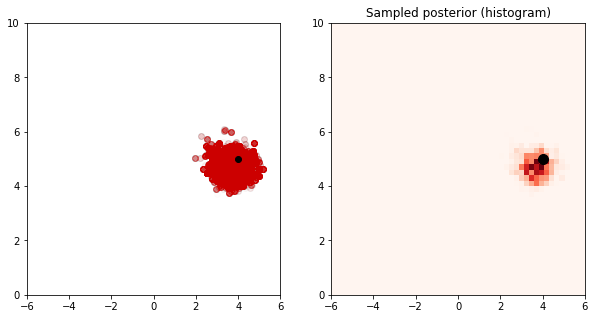

In [2]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(12345)

T = 100
z_true = 4
s_true = 5

Y = rng.normal(z_true, s_true, T)

def log_normal_pdf(x, mu, sigma):
    return -0.5*np.log(2*np.pi*sigma**2) - (x-mu)**2/(2*sigma**2)

sigma_q = 1
alpha = 4
beta = 5
m = 0
kappa = 2

N = 100000

z = np.zeros(N)
s = np.zeros(N)

z[0] = 0
s[0] = 1

acc = 0
fig = plt.figure(figsize=(10, 5))
burnin = 1000

for n in range(1, N):

    z_p = rng.normal(z[n-1], sigma_q, 1)
    s_temp = rng.gamma(alpha, 1/beta, 1)
    s_p = 1/s_temp

    logr = log_normal_pdf(z_p, m, kappa) + np.sum(log_normal_pdf(Y, z_p, s_p)) - log_normal_pdf(z[n-1], m, kappa) - np.sum(log_normal_pdf(Y, z[n-1], s[n-1]))

    u = rng.uniform(0, 1)

    if np.log(u) < logr:
        z[n] = z_p
        s[n] = s_p
    else:
        z[n] = z[n-1]
        s[n] = s[n-1]

plt.clf()
plt.subplot(1, 2, 1)
plt.scatter(z[burnin:n], s[burnin:n], color=[0.8, 0, 0], alpha=0.01, label='samples')
plt.scatter(z_true, s_true, color='k', marker='o', label='true')
plt.xlim([-6, 6])
plt.ylim([0, 10])
plt.subplot(1, 2, 2)
plt.hist2d(z[burnin:n], s[burnin:n], bins=50, density=True, cmap='Reds', range=[[-6, 6], [0, 10]])
plt.scatter(z_true, s_true, color='k', marker='o', s=100)
plt.title('Sampled posterior (histogram)')
plt.xlim([-6, 6])
plt.ylim([0, 10])
plt.show()
